In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def read_kitti_flow(filename):
    #reads the optical flow from the KITTI dataset
    # In R, flow along x-axis normalized by image width and quantized to [0;2^16 – 1]
    # In G, flow along x-axis normalized by image width and quantized to [0;2^16 – 1]
    # B = 0 for invalid flow (e.g., sky pixels)
    
    img = cv2.imread(filename,cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH )

    flow = img.astype(np.float32)
    flow = flow[:,:,1:]
    #undo quantization
    flow = flow-2**15
    flow = flow/64
    #valid data is in the last channel (first one because opencv-> bgr instead of)
    valid_data = img[:,:,0]
    
    #store u v arrow directions
    u = (flow[:, :, 1])
    v = (flow[:, :, 0])
    return u,v,valid_data  

def MSEN(u_pred, v_pred, u_gt, v_gt, valid_data_gt):
    distances = np.sqrt(np.power(u_pred - u_gt, 2) + np.power(v_pred - v_gt, 2))
    return np.mean(distances[valid_data_gt!=0]),distances[valid_data_gt!=0] 

def PEPN(u_pred, v_pred, u_gt, v_gt, valid_data_gt, th=3):
    distances = np.sqrt(np.power(u_pred - u_gt, 2) + np.power(v_pred - v_gt, 2))
    return (np.sum(distances[valid_data_gt!=0] > th) / np.sum(valid_data_gt!=0)) * 100, distances[valid_data_gt!=0] 

def optical_flow_metrics(filename_pred, filename_gt):
    
    dataset_flow_path_gt = '../datasets/data_stereo_flow/training/flow_noc/'
    filename_path_gt = dataset_flow_path_gt + filename_gt

    dataset_flow_path_pred = '../datasets/results/'
    filename_path_pred = dataset_flow_path_pred + filename_pred

    u_gt, v_gt, valid_data_gt = read_kitti_flow(filename_path_gt)
    u_gt = u_gt * valid_data_gt
    v_gt = v_gt * valid_data_gt

    u_pred, v_pred, valid_data_pred = read_kitti_flow(filename_path_pred)
    u_pred = u_pred * valid_data_pred
    v_pred = v_pred * valid_data_pred

    msen, msen_distances = MSEN(u_pred, v_pred, u_gt, v_gt, valid_data_gt)
    pepn, pepn_distances = PEPN(u_pred, v_pred, u_gt, v_gt, valid_data_gt)
    
    print('MSEN for image', filename_gt + ":", round(msen,4))
    print('PEPN for image', filename_gt + ":", str(round(pepn,4)) + "%")
    return msen_distances, pepn_distances

In [87]:
msen_array, pepn_array = optical_flow_metrics(filename_pred = 'LKflow_000045_10.png', filename_gt = '000045_10.png')


MSEN for image 000045_10.png: 10.6271
PEPN for image 000045_10.png: 78.5603%


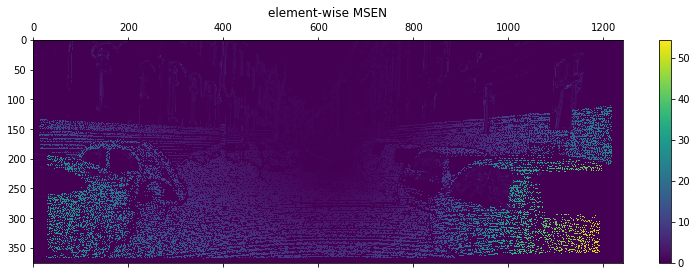

(376, 1241)

In [7]:
im = plt.matshow(msen_array, aspect='auto') # pl is pylab imported a pl
plt.colorbar(im)
plt.title("element-wise MSEN")
plt.show()
msen_array.shape

(0.0, 0.2)

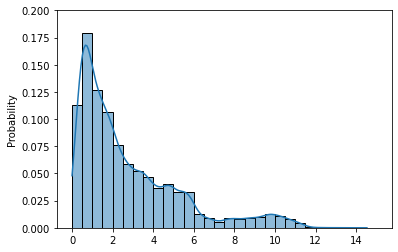

In [96]:
import seaborn as sns
sns.histplot(data=msen_array.flatten(),stat="probability", kde=True, binwidth=.5)
plt.ylim(0, 0.2)

MSEN for image 000157_10.png: 2.7504
PEPN for image 000157_10.png: 34.0476%


(0.0, 0.2)

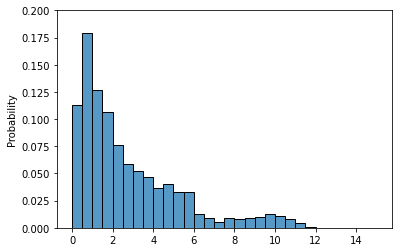

In [97]:
msen_array, pepn_array = optical_flow_metrics(filename_pred = 'LKflow_000157_10.png', filename_gt = '000157_10.png')
import seaborn as sns
sns.histplot(data=msen_array.flatten(),stat="probability", kde=False, binwidth=.5)
plt.ylim(0, 0.2)

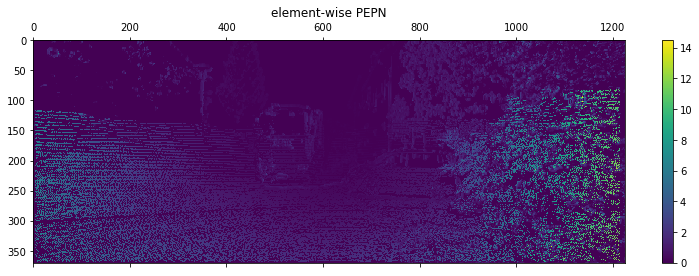

In [23]:
im = plt.matshow(pepn_array, aspect='auto') # pl is pylab imported a pl
plt.colorbar(im)
plt.title("element-wise PEPN")
plt.show()
